In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [10]:
data = pd.read_csv('/content/AirPassengers (1).csv')

In [11]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
data = data.rename(columns={"#Passengers": "Passengers"}, inplace=False)
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format = '%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Plotting Time Series Data

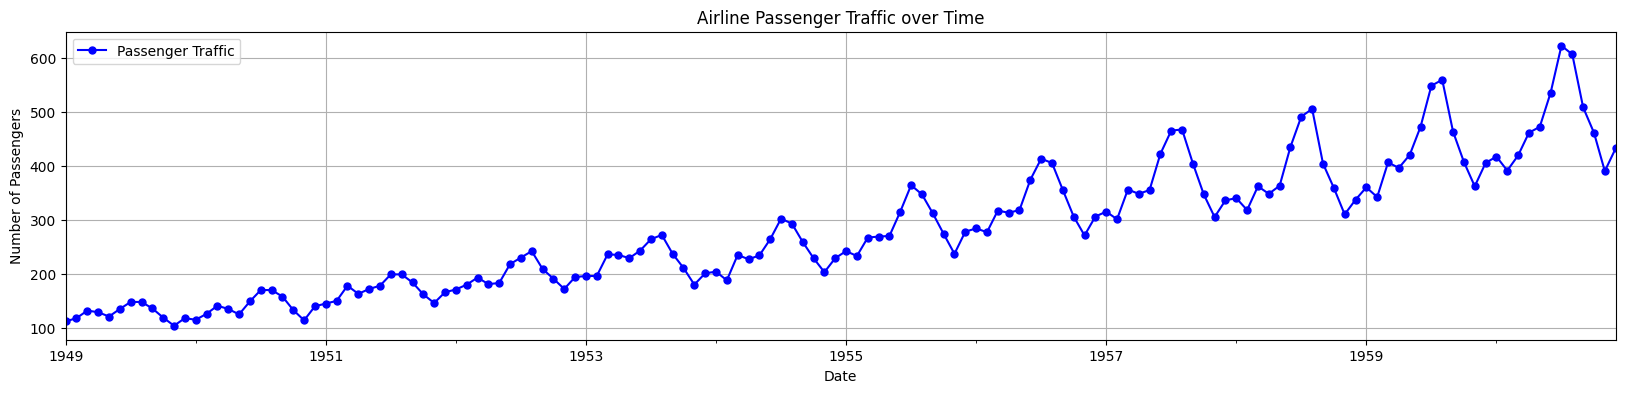

In [15]:
data.plot(y='Passengers', figsize=(20, 4), color='blue', linestyle='-', marker='o', markersize=5, label='Passenger Traffic')
plt.grid(True)
plt.legend(loc='best')
plt.title('Airline Passenger Traffic over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show(block= False)

# **Missing Value Treatment**

# Mean Imputation

In [16]:
data['Passengers Mean Imputation'] = data['Passengers'].fillna(data['Passengers'].mean())

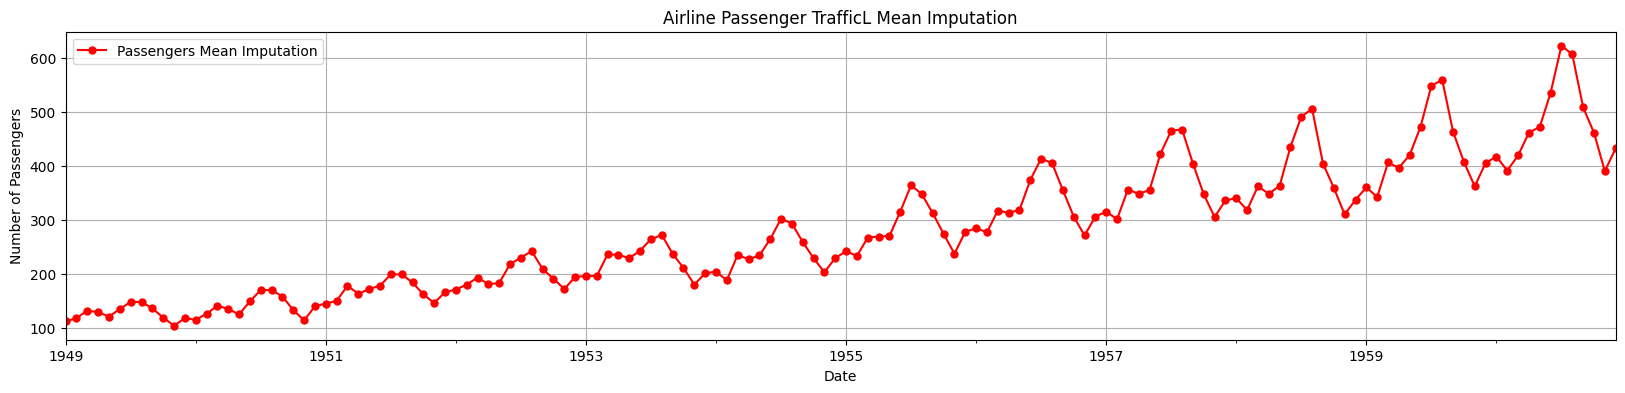

In [20]:
data[['Passengers Mean Imputation']].plot(figsize=(20, 4), grid=True, legend=True, color='red', linestyle='-', marker='o', markersize=5)
plt.title('Airline Passenger TrafficL Mean Imputation')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show(block = False)


### **Linear Interpolation**

In [21]:
data['Passenger Linear Interpolation'] = data['Passengers'].interpolate(method = 'linear')

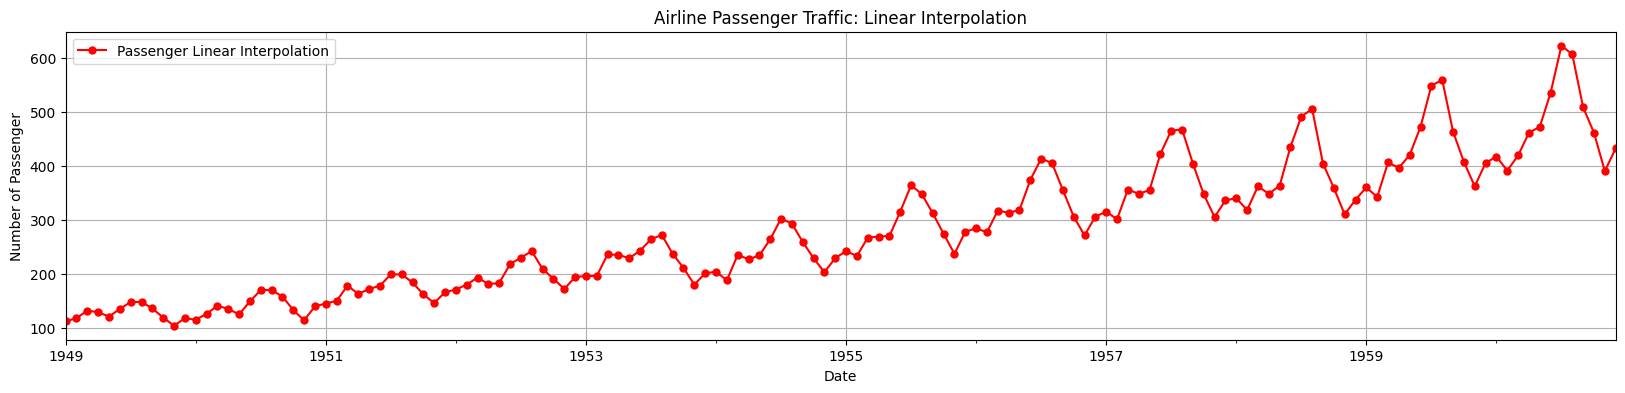

In [23]:
data[['Passenger Linear Interpolation']].plot(figsize=(20, 4), grid=True, legend=True, color='red', linestyle='-', marker='o', markersize=5)
plt.title('Airline Passenger Traffic: Linear Interpolation')
plt.xlabel('Date')
plt.ylabel('Number of Passenger')
plt.show(block = False)

In [24]:
data.head()

,Passengers,Passengers Mean Imputation,Passenger Linear Interpolation
Month,,,
1949-01-01,112,112,112
1949-02-01,118,118,118
1949-03-01,132,132,132
1949-04-01,129,129,129
1949-05-01,121,121,121


In [27]:
data['Passengers'] = data['Passenger Linear Interpolation']
data.drop(columns=['Passengers Mean Imputation','Passenger Linear Interpolation'], inplace = True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## **Outlier Detection**

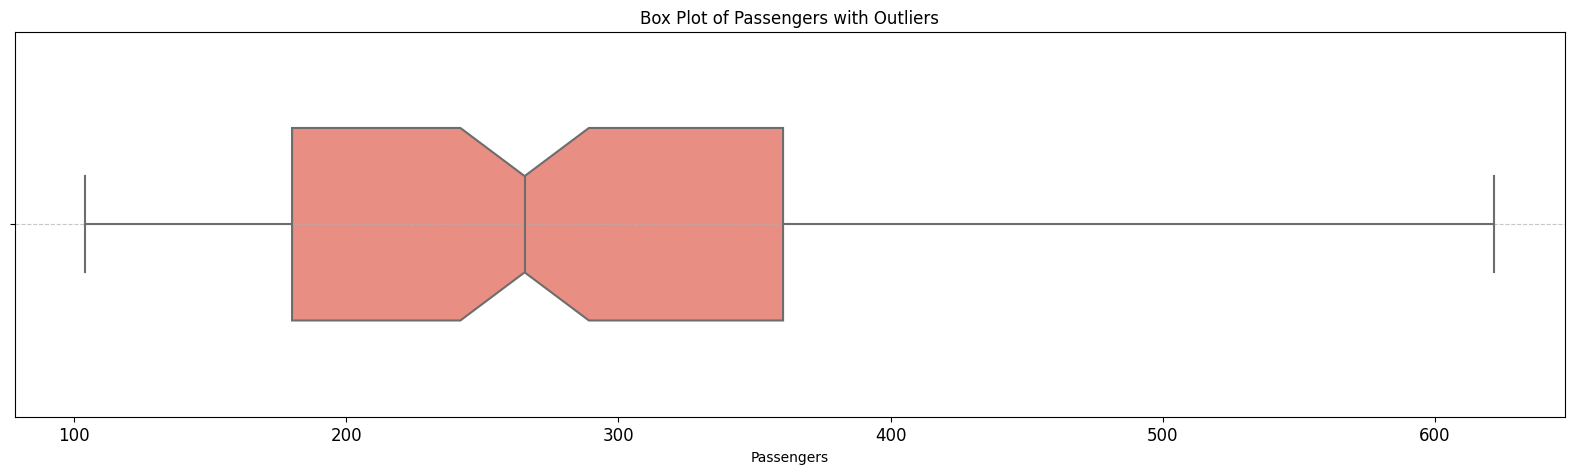

In [28]:
plt.figure(figsize=(20,5))
sns.boxplot(x =data['Passengers'], color = 'salmon', width= 0.5, notch= True)
plt.title('Box Plot of Passengers with Outliers')
plt.xlabel('Passengers')
plt.xticks(fontsize= 12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **Histogram Plot**

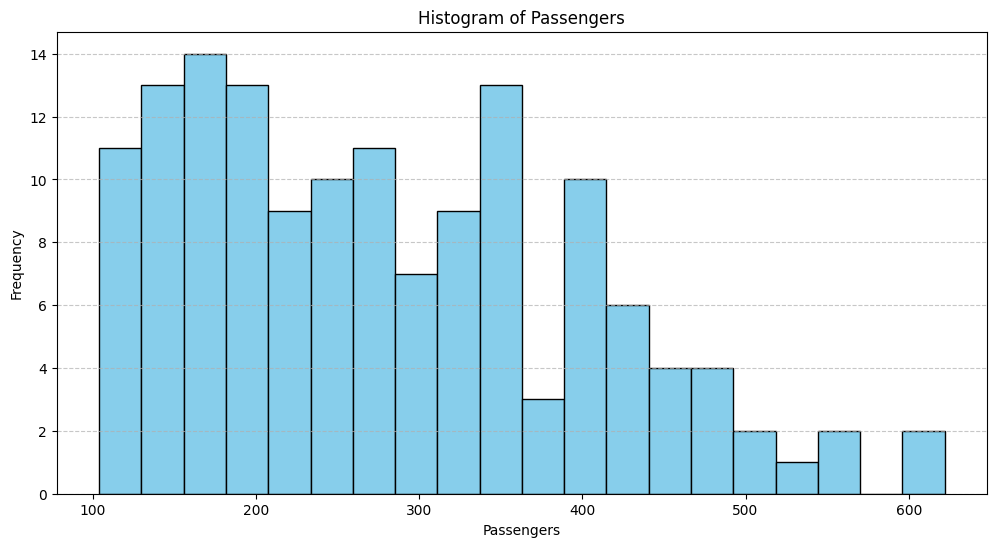

In [29]:
plt.figure(figsize=(12, 6))
plt.hist(data['Passengers'], bins= 20, color= 'skyblue', edgecolor = 'black')
plt.title('Histogram of Passengers')
plt.xlabel('Passengers')
plt.ylabel('Frequency')
plt.grid(axis= 'y', linestyle = '--', alpha=0.7)
plt.show()

# **Time Series Decomposition**

## Additive Seasonal Decomposition

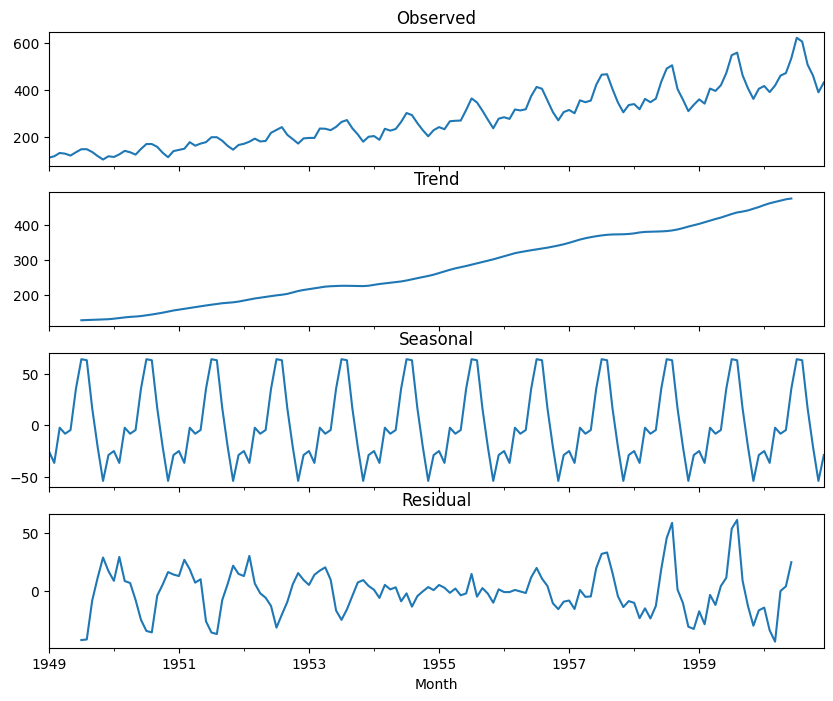

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Passengers'], model = 'additive')
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,8), sharex= True)

result.observed.plot(ax= ax1, title= 'Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')

plt.show()


### **Multiplicative Seasonal Decomposition**

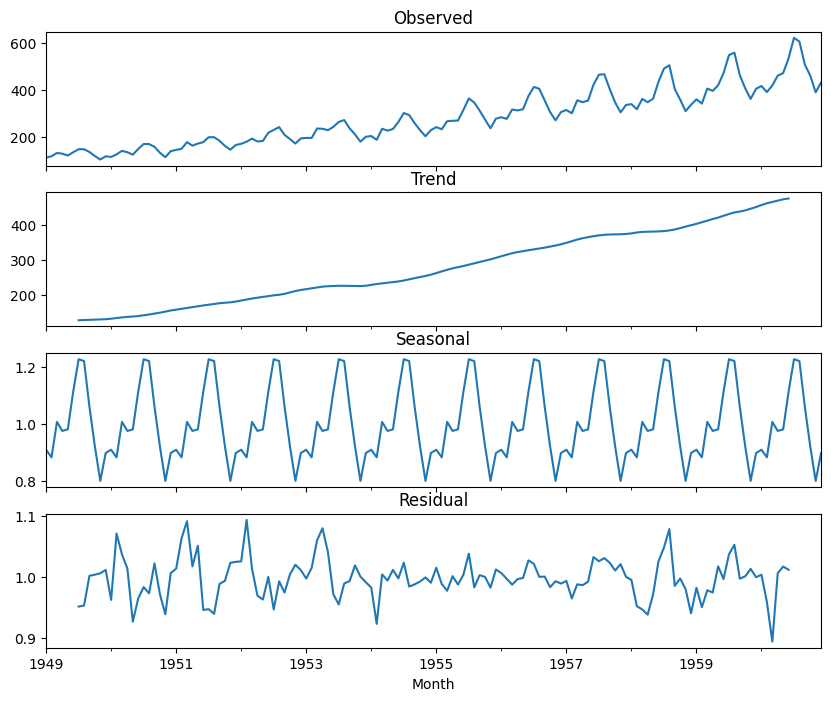

In [32]:
result = seasonal_decompose(data['Passengers'], model='multiplicative')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')
plt.show()

# **Build and Evaluate Time Series Forecast**

In [33]:
train_len = 120
train = data[:train_len]  # first 120 months as the training set
test = data[train_len:]  # last 24 months as the out-of-time test set

### **Exponential Smoothing Methods**

**Simple Exponential Smoothing**

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.2,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [35]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

### **Plot Train Test Forecast**

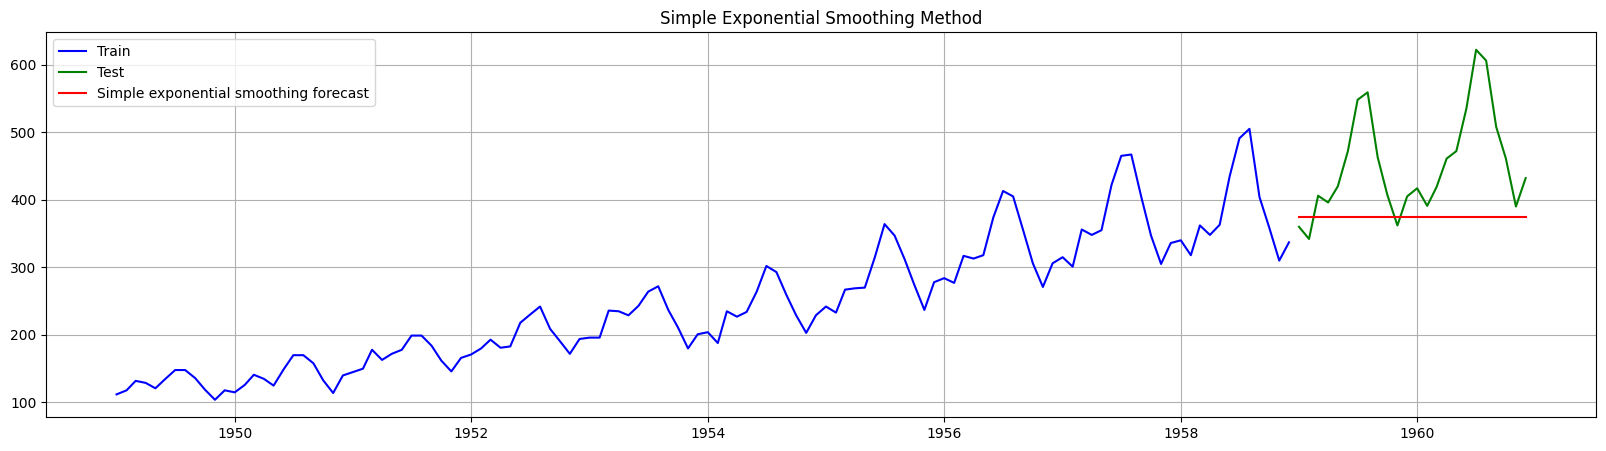

In [36]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Passengers'], label='Train', color='blue')
plt.plot(test['Passengers'], label='Test',color='green')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast',color='red')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### **Calculate RMSE and MAPE**

In [37]:
results = pd.DataFrame(columns = ['Method','RMSE','MAPE'])

In [38]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']- y_hat_ses['ses_forecast'])/ test['Passengers'])*100,2 )


In [40]:
tempResults = pd.DataFrame({'Method':['Simple Exponential Smoothing Forecast'], 'RMSE': [rmse], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing Forecast,107.52,16.43


### **Holt's Method with trend**

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.46666666666661, 'initial_trend': 2.0606060606060677, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


<ipython-input-41-b64b9a2f05d1>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)


In [42]:
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

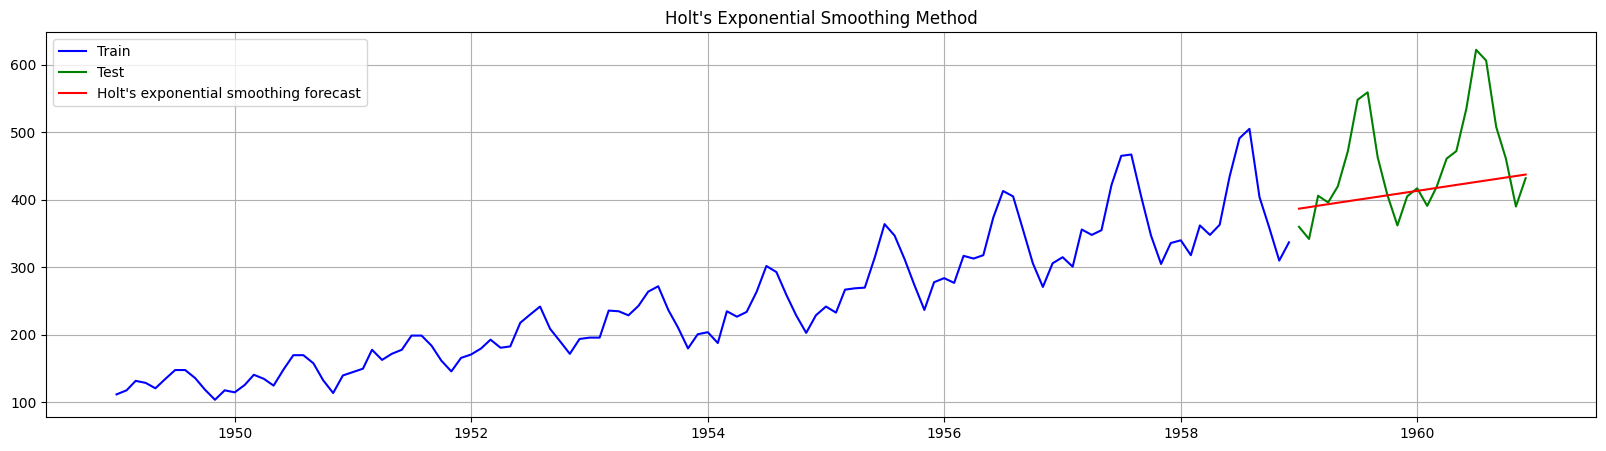

In [43]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot( train['Passengers'], label='Train',color='blue')
plt.plot(test['Passengers'], label='Test',color='green')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast',color='red')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [44]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

In [46]:
tempResults = pd.DataFrame({'Method':['Holt\'s Exponential Smoothing Method'], 'RMSE':[rmse], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing Forecast,107.52,16.43
0,Holt's Exponential Smoothing Method,80.90,11.32


# **Hot Winters' Additive Method with Trend and Seasonality**

In [47]:
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
forecast_values = model_fit.forecast(len(test))
y_hat_hwa['hw_forecast'] = forecast_values

{'smoothing_level': 0.23678678235712566, 'smoothing_trend': 1.8055668382578714e-09, 'smoothing_seasonal': 0.7632132086415252, 'damping_trend': nan, 'initial_level': 119.1876680939318, 'initial_trend': 2.2768394955266533, 'initial_seasons': array([ -9.42424719,  -3.87104168,   8.69002781,   3.6678027 ,
        -4.94701962,   9.26652064,  21.53444859,  19.2001798 ,
         5.07181472, -13.80997707, -28.51179942, -12.37245268]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


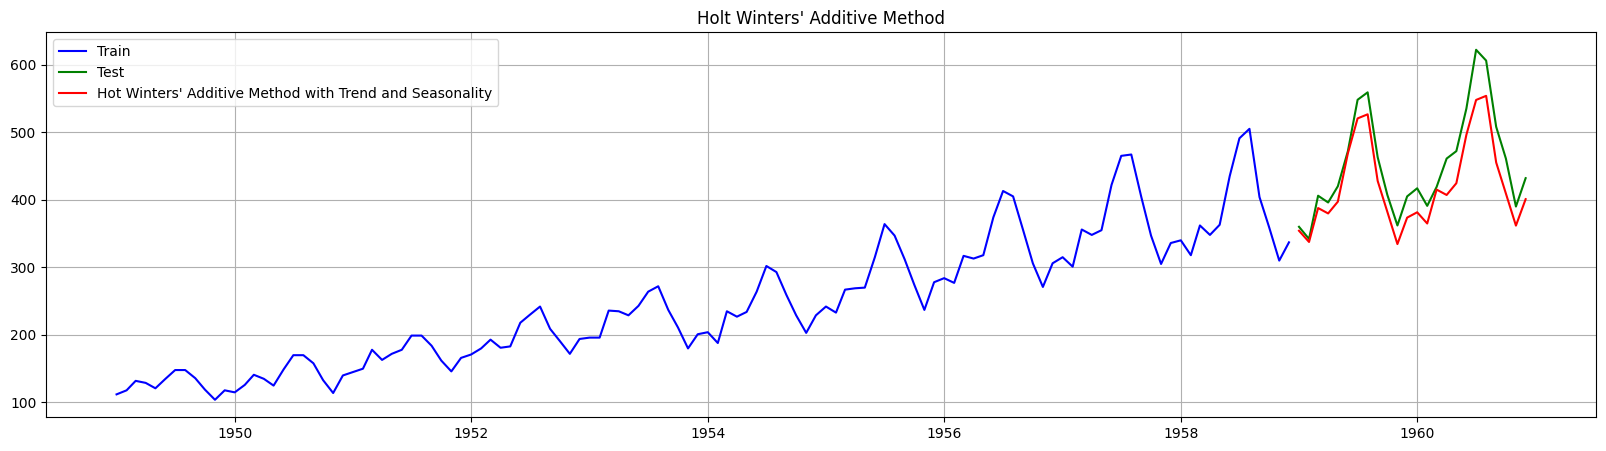

In [48]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Passengers'], label = 'Train', color= 'blue')
plt.plot(test['Passengers'], label = 'Test', color = 'green')
plt.plot(y_hat_hwa['hw_forecast'], label = "Hot Winters' Additive Method with Trend and Seasonality", color = 'red')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [49]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

In [50]:
tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing Forecast,107.52,16.43
0,Holt's Exponential Smoothing Method,80.90,11.32
0,Holt Winters' additive method,35.76,6.64


# **Holt Winter's Multiplicative Method with Trend and Seasonality**

In [51]:
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.364208357460606, 'smoothing_trend': 4.191162581733996e-09, 'smoothing_seasonal': 0.6357916412612594, 'damping_trend': nan, 'initial_level': 110.89386078445895, 'initial_trend': 2.389331198805944, 'initial_seasons': array([0.98867675, 1.03912176, 1.14217091, 1.08689584, 1.00612809,
       1.10442233, 1.20431631, 1.18998306, 1.08561792, 0.94580897,
       0.84005265, 0.96819086]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [52]:
y_hat_hwm = test.copy()
forecast_values = model_fit.forecast(len(test))
y_hat_hwm['hw_forecast'] = forecast_values

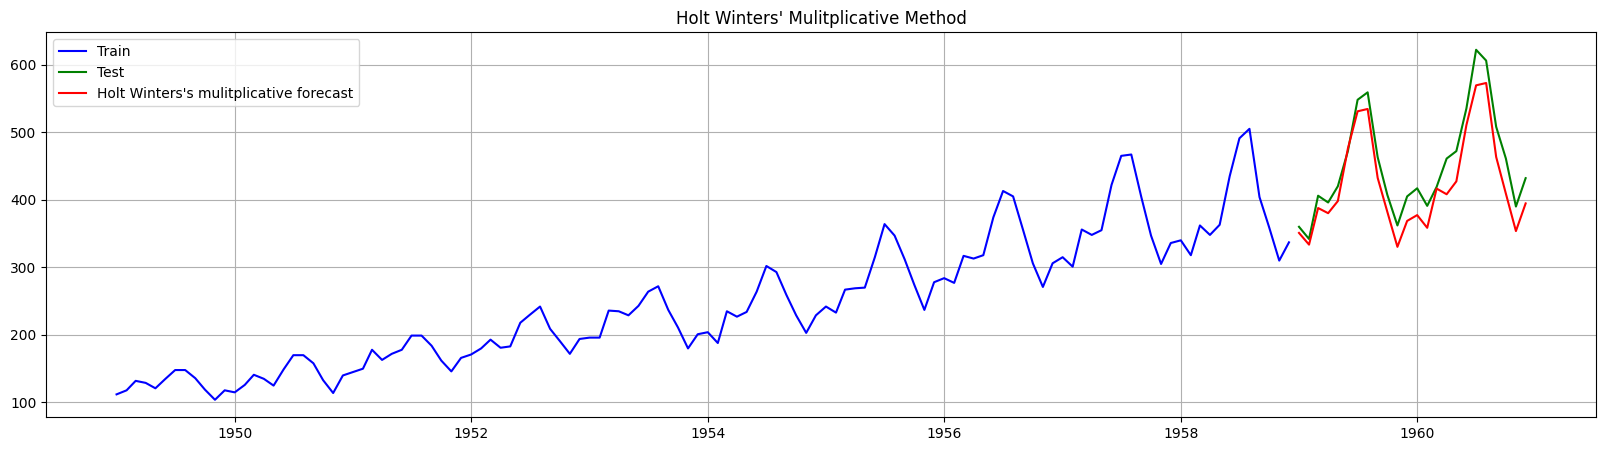

In [53]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot( train['Passengers'], label='Train',color='blue')
plt.plot(test['Passengers'], label='Test',color='green')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast',color='red')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [54]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

In [55]:
tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple Exponential Smoothing Forecast,107.52,16.43
0,Holt's Exponential Smoothing Method,80.90,11.32
0,Holt Winters' additive method,35.76,6.64
0,Holt Winters' multiplicative method,32.49,6.39
